# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [130]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url,
                    sep='\t',
                    index_col='order_id')

### Step 4. See the first 10 entries

In [131]:
chipo.head()

,quantity,item_name,choice_description,item_price
order_id,,,,
1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,Izze,[Clementine],$3.39
1,1,Nantucket Nectar,[Apple],$3.39
1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 5. Create a histogram of the top 5 items bought

<Axes: title={'center': "Most ordered Chipotle's Items"}, xlabel='Items', ylabel='Number of Times Ordered'>

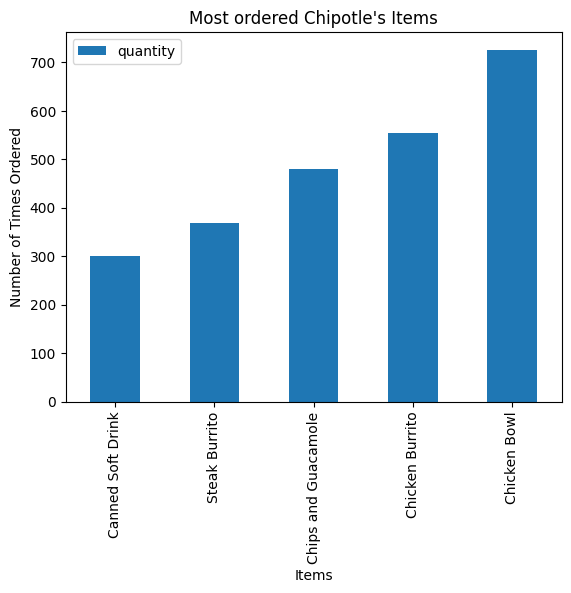

In [132]:
most_bought = chipo.groupby(by='item_name').count()
most_bought = most_bought.sort_values(by='quantity',ascending=True)

most_bought[['quantity']].tail(5).plot(kind='bar',xlabel='Items',ylabel='Number of Times Ordered',title='Most ordered Chipotle\'s Items')

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [150]:
chipo.head()

,quantity,item_name,choice_description,item_price
order_id,,,,
1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,Izze,[Clementine],3.39
1,1,Nantucket Nectar,[Apple],3.39
1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


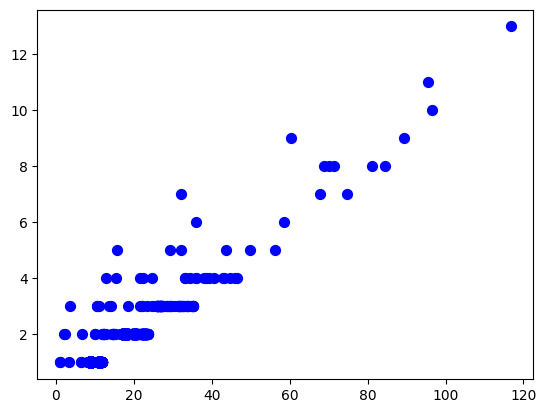

In [170]:
# def dolarize(x):
#     if(type(x) != type(float)):
#         x = x[1:-1]
#     return float(x)

# chipo['item_price'] = chipo['item_price'].apply(dolarize)
gp = chipo.dropna().drop_duplicates().groupby(by='order_id').sum()

plt.scatter(x=gp['item_price'],y=gp['quantity'],s=50,c='blue')



### Step 7. BONUS: Create a question and a graph to answer your own question.

In [187]:
chipo['item_name'].value_counts()

item_name
Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48


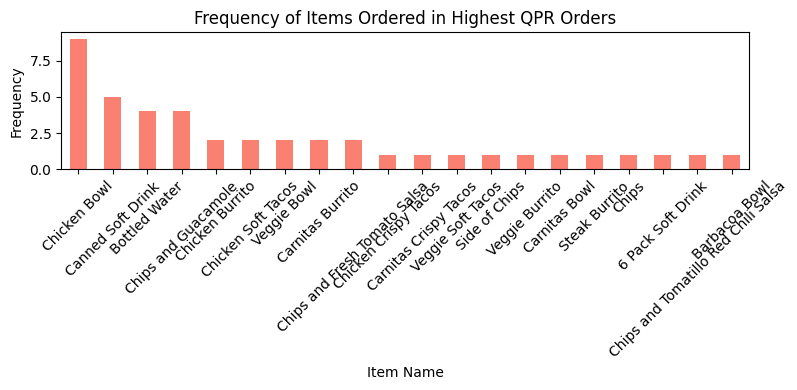

In [284]:
#most packed and least priced orders.
 
gp_packed = chipo.groupby(by='order_id').sum(numeric_only=True)

gp_packed['quantity_price_ratio']= gp_packed['quantity'] / gp_packed['item_price']

top5 = gp_packed[gp_packed['quantity']>15].sort_values(by=('quantity_price_ratio'),ascending=False).head()


item_names= chipo.loc[top5.index,]
df_item_names = pd.DataFrame(item_names)

item_counts = df_item_names['item_name'].value_counts()

# Plot as a bar chart
item_counts.plot(kind='bar', color='salmon', figsize=(8,4))
plt.xlabel('Item Name')
plt.ylabel('Frequency')
plt.title('Frequency of Items Ordered in Highest QPR Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

